---

# **I. Import Libraries**

Let's start with importing essential libraries.

In [ ]:
import numpy as np              # scientific computing
import pandas as pd             # high-performance data structures
import matplotlib.pyplot as plt # data visualization
import seaborn as sb            # high-level data visualization
import os

---

# **II. Take a Quick Look at the Data Structure**

Read the data `.csv` file and put it in a dataframe.

In [2]:
# Import data
cardio_raw = pd.read_csv('cardio_train.csv', sep=';')

# Take a look at some random data points from the dataset
cardio_raw.sample(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
23189,33131,19782,2,164,49.0,130,70,1,1,1,0,1,0
7746,11059,18385,2,173,82.0,110,80,1,1,0,0,1,0
17360,24804,23294,1,164,100.0,130,80,1,1,0,0,1,1
6186,8807,17614,2,165,78.0,120,70,1,1,0,0,1,1
27087,38731,19964,1,160,68.0,140,90,1,1,0,0,0,1
4604,6521,16789,1,145,57.0,140,80,3,3,0,0,1,1
17698,25295,20332,1,150,76.0,130,90,3,1,0,0,1,1
1557,2204,19055,2,170,72.0,120,80,1,1,0,0,1,0
39672,56683,20405,1,169,61.0,110,70,1,1,0,0,1,0
32129,45885,18788,2,174,71.0,120,90,1,1,0,0,1,0


Description of the dataset, as available on Kaggle, is as follows.<br>
Learn more: <a href='https://www.kaggle.com/sulianova/cardiovascular-disease-dataset'>https://www.kaggle.com/sulianova/cardiovascular-disease-dataset</a>

---

There are 3 types of input features:

> **Objective**: factual information;<br>
> **Examination**: results of medical examination;<br>
> **Subjective**: information given by the patient.

---

Features:

> **age** : Age | Objective Feature | age | int (days) |<br>
> **gender** : Gender | Objective Feature | gender | 1: women, 2: men |<br>
> **height** : Height | Objective Feature | height | int (cm) |<br>
> **weight** : Weight | Objective Feature | weight | float (kg) |<br>
> **ap_hi** : Systolic blood pressure | Examination Feature | ap_hi | int |<br>
> **ap_lo** : Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
> **cholesterol** : Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
> **gluc** : Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
> **smoke** : Smoking | Subjective Feature | smoke | binary |<br>
> **alco** : Alcohol intake | Subjective Feature | alco | binary |<br>
> **active** : Physical activity | Subjective Feature | active | binary |<br>
> **cardio** : Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

---

All of the dataset values were collected at the moment of medical examination.

In [3]:
# Basic information about the dataset
cardio_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There are 70,000 instances in the dataset, which is not bad for this Machine Learning project. There is no missing values in this dataset, so we don't have to worry about handling data loss.

---

# **III. Data Preprocessing**

Let's make a copy of the dataset to test as we have yet known whether the way we're going to preprocess it is more helpful for the training model or not.

In [30]:
# Create a copy of the dataset
cardio = cardio_raw.copy()

The `id` attribute is not a useful attribute which we can use in our Machine Learning model, so we need to remove this column.

There are **$5$ numerical** attributes which is `age`, `height`, `weight`, `ap_hi`, `ap_lo` and **$6$ categorical** attributes which is `gender`, `cholesterol`, `gluc`, `smoke`, `alco`, `active`. However, the pandas `.info()` method interpreted all attributes as numerical type. Therefore, we have to convert each of these categorical variables into “category” data type.

Also don't forget to convert the target variable `cardio` into "category" datatype.

In [31]:
# Remove the id column
cardio = cardio.drop(columns='id')

# Convert categorical variables into “category” data type
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# Create a list that contains numerical attributes
num_attribs = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Covert the data type of categorical attributes into "category"
for cat_attrib in cat_attribs:                                # iterate over each categorical attribute
  cardio[cat_attrib] = cardio[cat_attrib].astype('category')  # convert data type

The `describe()` method shows a summary of the numerical attributes.

In [32]:
# Summary of numerical attributes' statistics
cardio.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0


The `age` in the raw data is displayed in units of days, which seems unintuitive. It makes more sense to convert it to units of year.

In [33]:
# Convert the age into years
cardio['age'] = cardio['age'] // 365.25

Check the summary statistics visually using `boxplot()`.

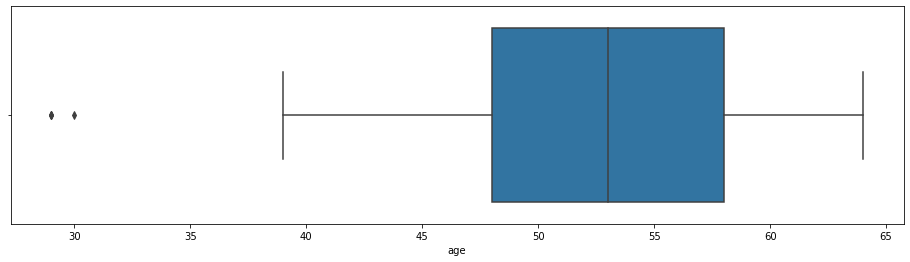

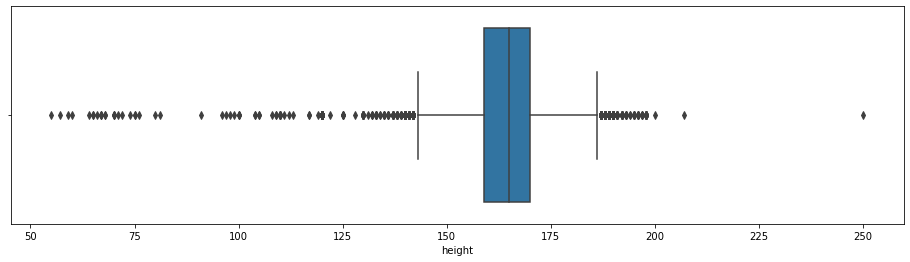

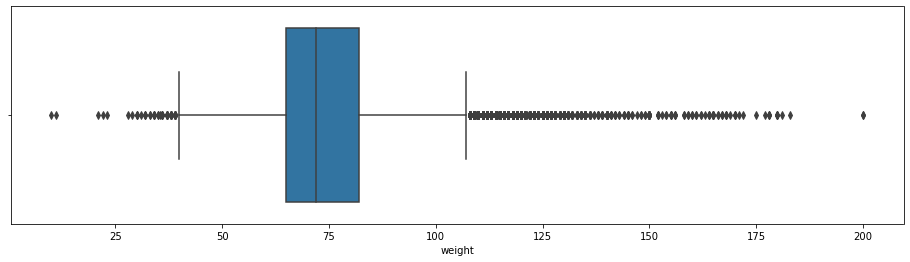

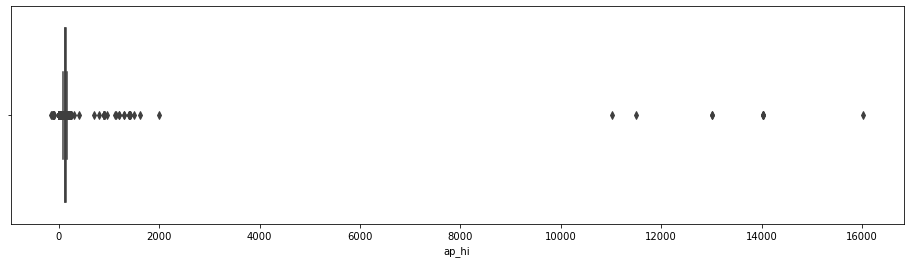

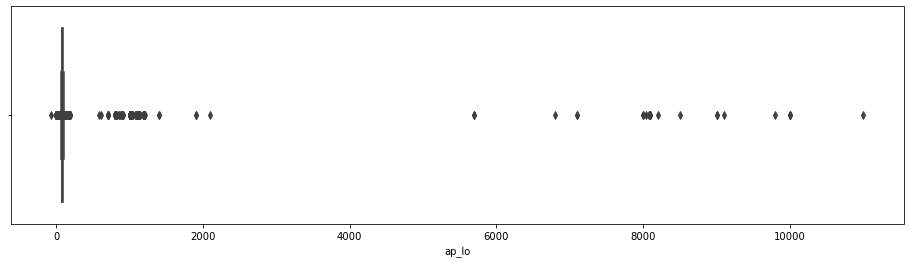

In [34]:
# Extract numerical attributes from the dataset
numeric_data = pd.DataFrame(cardio[num_attribs])

# Boxplot of the numeric data
for var in numeric_data:                          # iterate over numerical attributes
  fig, axes = plt.subplots(1, 1, figsize=(16,4))  # setup the frame of the plot
  sb.boxplot(data=cardio, x=var, orient='h')      # box plot

From the distribution graph of `ap_hi` and `ap_lo` we can see a lot of unusual values since the Systolic and Diastolic blood pressure is bounded between $40$ and $200 mmHg$.

$140 mmHg$ is already considered high blood pressure and values above $200$ shouldn't be humanly possible as it will cause blood vessel to rupture. $60 mmHg$ is considered low blood pressure and a change of $20 mmHg$ can cause fainting and dizziness.

One way to deal with this problem is to omit the training examples whose values ​​of `ap_hi` and `ap_lo` are outside the range $40-200 mmHg$. Let's see how many unusual training examples are there.

In [9]:
# Extract Systolic (ap_hi) and Diastolic (ap_lo) blood pressure
ap_hi = cardio['ap_hi']
ap_lo = cardio['ap_lo']

# Print number of unusual training examples
print("The number of training examples have ap_hi and ap_lo outside the range of 40-200mmHg")
display(len(cardio) - cardio['cardio'].loc[(ap_hi > 40) & (ap_hi < 200) & (ap_lo > 40) & (ap_lo < 200)].count())

The number of training examples have ap_hi and ap_lo outside the range of 40-200mmHg


1390

That's almost $2$% of the dataset!

We don't want to lose that much data just based on excluding training examples with abnormal blood pressure values. We have yet known if blood pressure is the dominant factor determining the outcome of the diagnosis. Therefore, we will go for another solution which is converting Systolic and Diastolic blood pressure to "category" data type.

The values ​​of blood pressure will be ranked as in the following table:

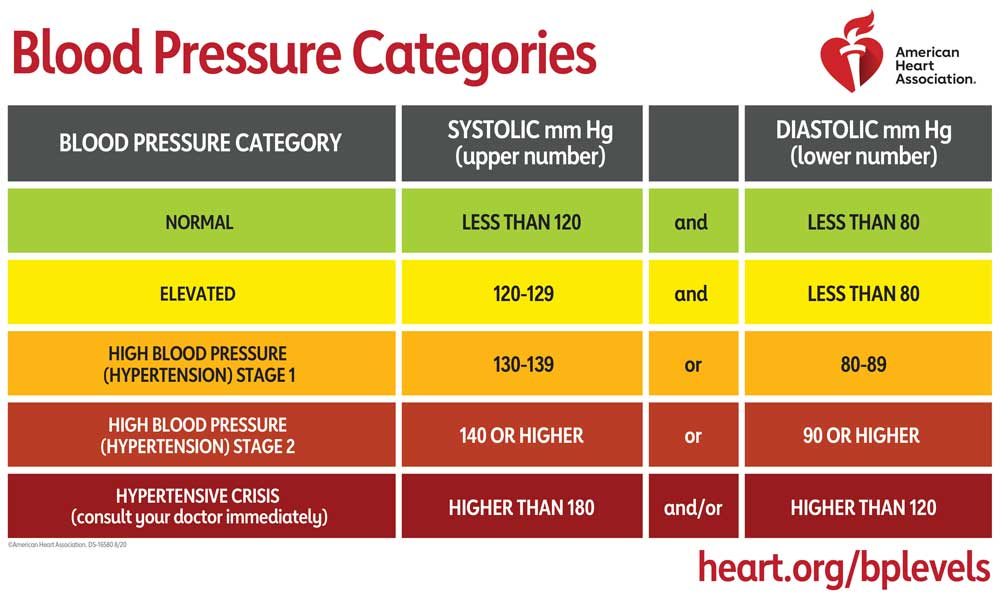

Assign the $5$ stages of the blood pressure category for the corresponding range from $1$ to $5$:


1.   Normal
2.   Elevated
3.   High blood pressure (hypertension) Stage $1$
4.   High blood pressure (hypertension) Stage $2$
5.   Hypertensive crisis (consult your doctor immediately)



In [10]:
# Rank Systolic blood pressure
cardio.loc[ap_hi < 120, 'ap_hi'] = 1
cardio.loc[(ap_hi >= 120) & (ap_hi < 130), 'ap_hi'] = 2
cardio.loc[(ap_hi >= 130) & (ap_hi < 140), 'ap_hi'] = 3
cardio.loc[(ap_hi >= 140) & (ap_hi <= 180), 'ap_hi'] = 4
cardio.loc[ap_hi > 180, 'ap_hi'] = 5

# Rank Diastolic blood pressure
cardio.loc[ap_lo < 80, 'ap_lo'] = 1
cardio.loc[(ap_lo >= 80) & (ap_lo < 90), 'ap_lo'] = 3
cardio.loc[(ap_lo >= 90) & (ap_lo <= 120), 'ap_lo'] = 4
cardio.loc[ap_lo > 120, 'ap_lo'] = 5

Rank blood pressure, append new column of blood pressure `bp` to `cardio` dataframe and drop `ap_hi`, `ap_lo` columns.

In [11]:
# Rank blood pressure and append it to the dataframe
bp = pd.DataFrame(cardio[['ap_hi', 'ap_lo']])
cardio['bp'] = bp.max(axis=1).astype('category')

# Drop ap_hi, ap_lo columns
cardio = cardio.drop(columns=['ap_hi', 'ap_lo'])

# Update categorical and numerical attributes
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp', 'cardio']
num_attribs = ['age', 'height', 'weight']

Visualize the summary of uni-variate Distributions of each numerical attribute using `boxplot()`, `histplot()` and `violinplot()`.

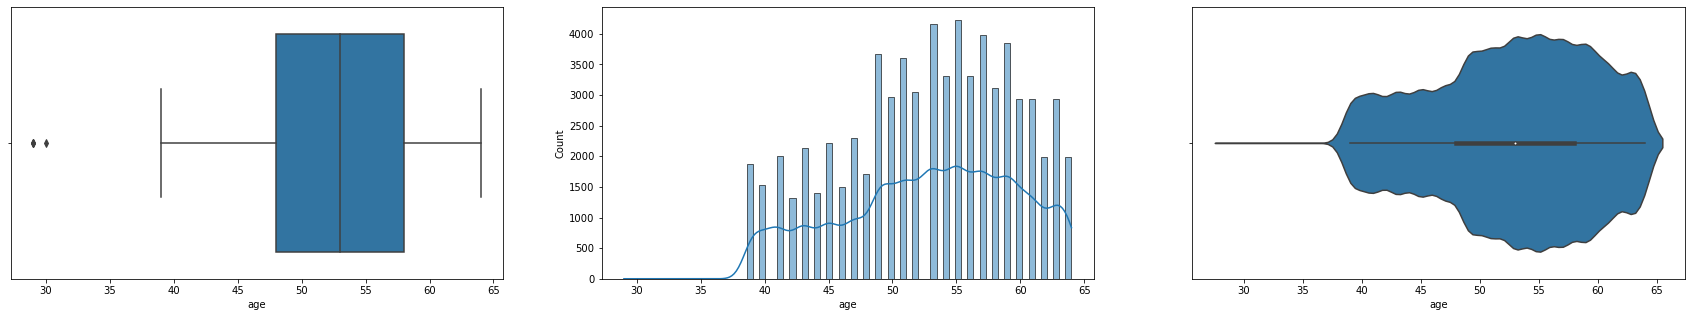

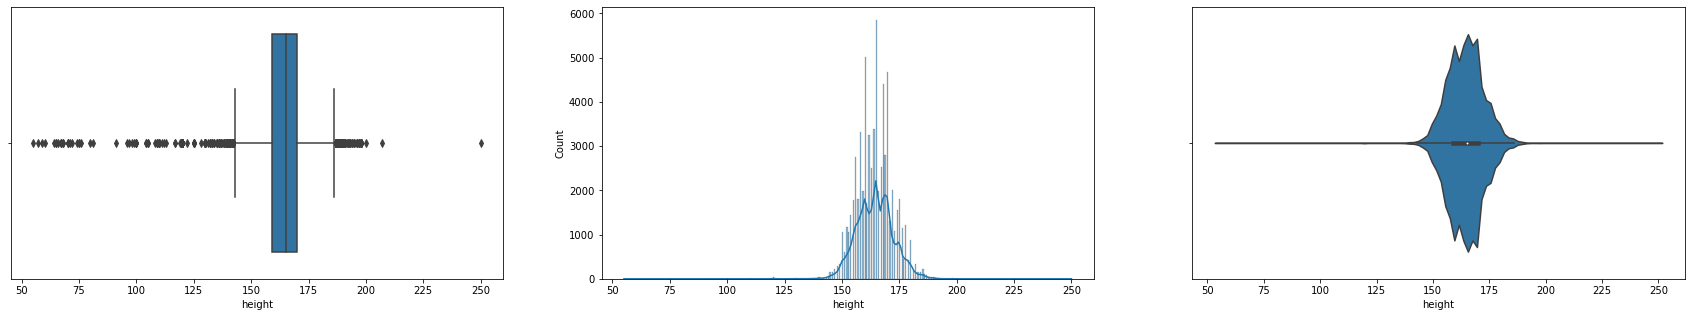

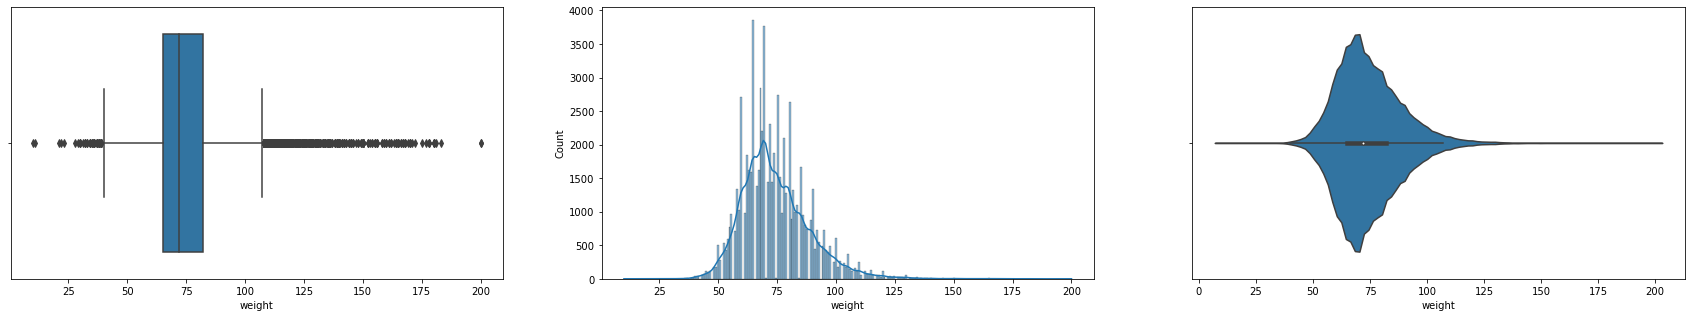

In [12]:
# Univariate analysis
for attribs in num_attribs:                                     # iterate over numerical attributes
  fig, axes = plt.subplots(1, 3, figsize=(30,5))                # setup the frame of the plot
  sb.boxplot(data=cardio, x=attribs, orient='h', ax=axes[0])    # box plot
  sb.histplot(data=cardio[attribs], kde=True, ax=axes[1])       # histogram with Kernel Density Estimators (KDE)
  sb.violinplot(data=cardio, x=attribs, orient='h', ax=axes[2]) # violin plot

The majority of patients whose information was provided in the dataset are:


*   Between the ages of $39$ and $64$ years old
*   Between the heights of $145$ and $185 cm$
*   Between the weights of $40$ and $105 kg$


It also can be seen that `height` and `weight` have a lot of outliers but these points are still in a reasonable range. For the purpose of learning, we will intentionally keep those outliers and see how they will affect the model.

Use `catplot()` to visualize the distribution of each category in a categorical attribute.

1    45530
2    24470
Name: gender, dtype: int64


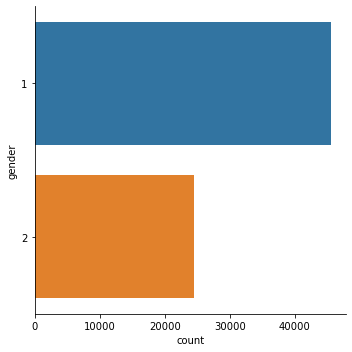

In [13]:
# Plot the count of each category in gender
print(cardio['gender'].value_counts())            # count the number of each category
sb.catplot(y='gender', data=cardio, kind='count') # categorical plot

Stage of Cholesterol: 3
1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64


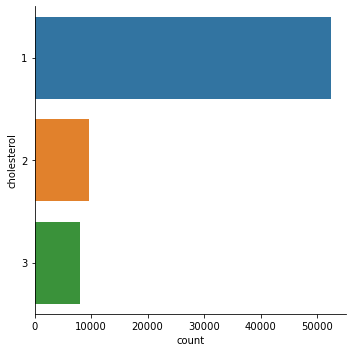

In [14]:
# Print the number of unique categories in cholesterol
print("Stage of Cholesterol:", len(cardio['cholesterol'].unique()))

# Plot the count of each category in cholesterol
print(cardio['cholesterol'].value_counts())             # count the number of each category
sb.catplot(y='cholesterol', data=cardio, kind='count')  # categorical plot

Stage of Glucose: 3
1    59479
3     5331
2     5190
Name: gluc, dtype: int64


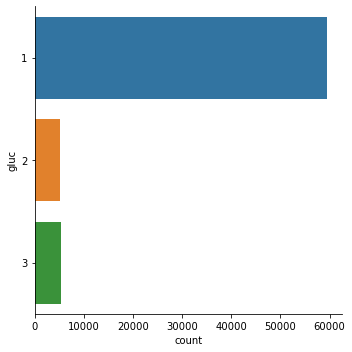

In [15]:
# Print the number of unique categories in glucose
print("Stage of Glucose:", len(cardio['gluc'].unique()))

# Plot the count of each category in glucose
print(cardio['gluc'].value_counts())            # count the number of each category
sb.catplot(y='gluc', data=cardio, kind='count') # categorical plot

0    63831
1     6169
Name: smoke, dtype: int64


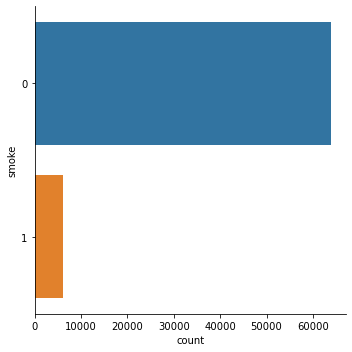

In [16]:
# Plot the count of each category in smoke
print(cardio['smoke'].value_counts())             # count the number of each category
sb.catplot(y='smoke', data=cardio, kind='count')  # categorical plot

0    66236
1     3764
Name: alco, dtype: int64


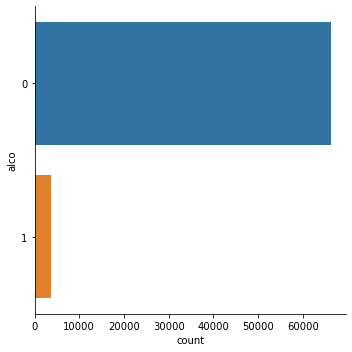

In [17]:
# Plot the count of each category in alco
print(cardio['alco'].value_counts())            # count the number of each category
sb.catplot(y='alco', data=cardio, kind='count') # categorical plot

1    56261
0    13739
Name: active, dtype: int64


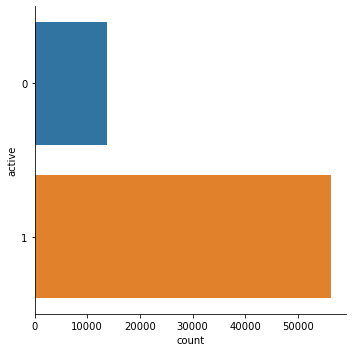

In [18]:
# Plot the count of each category in active
print(cardio['active'].value_counts())            # count the number of each category
sb.catplot(y='active', data=cardio, kind='count') # categorical plot

Stage of Blood pressure: 5
3    32562
4    23357
1     9608
2     3125
5     1348
Name: bp, dtype: int64


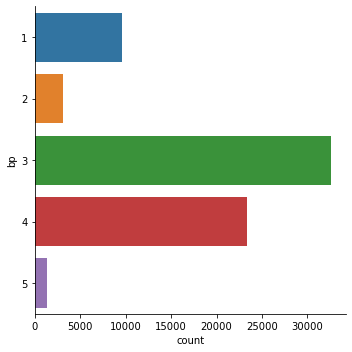

In [19]:
# Print the number of unique categories in blood pressure
print("Stage of Blood pressure:", len(cardio['bp'].unique()))

# Plot the count of each category in blood pressure
print(cardio['bp'].value_counts())            # count the number of each category
sb.catplot(y='bp', data=cardio, kind='count') # categorical plot

0    35021
1    34979
Name: cardio, dtype: int64


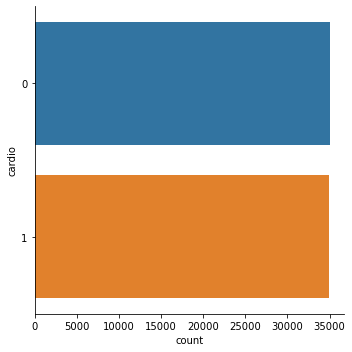

In [20]:
# Plot the count of each category in target class
print(cardio['cardio'].value_counts())            # count the number of each category
sb.catplot(y='cardio', data=cardio, kind='count') # categorical plot

It seemed that in the dataset, the majority of people:


*   Have normal cholesterol and glucose level
*   Neither smoke nor drink alcohol
*   Regularly do physical activities
*   Have high blood pressure (either stage $1$ or $2$)


The target variable `cardio` has a balanced between positive and negative examples. The ratio of female to male is $1.8:1$.

In [21]:
# Convert gender to binary categorical attribute
cardio['gender'] = (cardio['gender'].astype('int') - 1).astype('category')

---

# **IV. Exploratory Analysis**

So far we have taken a glance at the data to get the general understanding. We have also cleaned the data to make it easier to use for the following steps.

In this part of the notebook, we will be exploring further the **Cardiovascular Disease Dataset**.

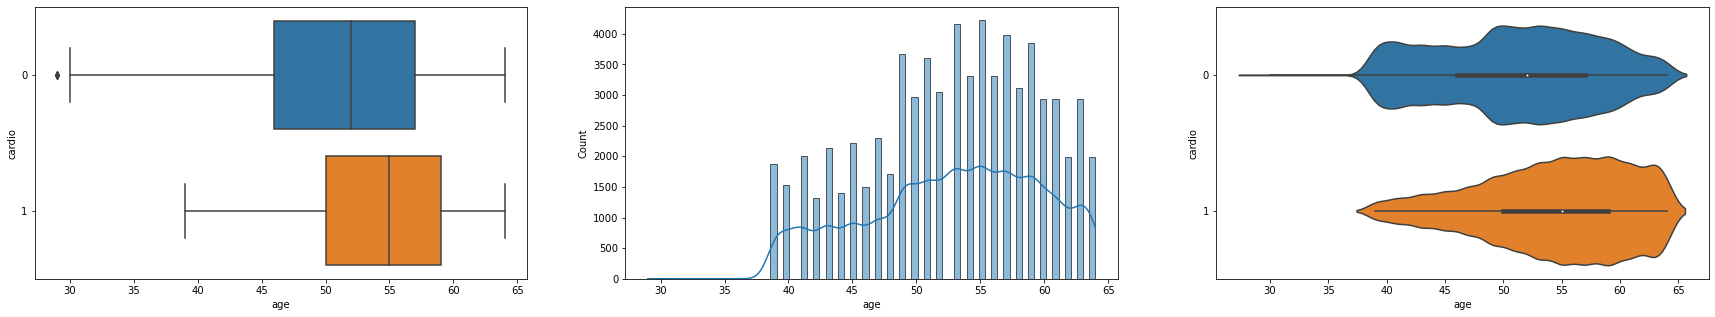

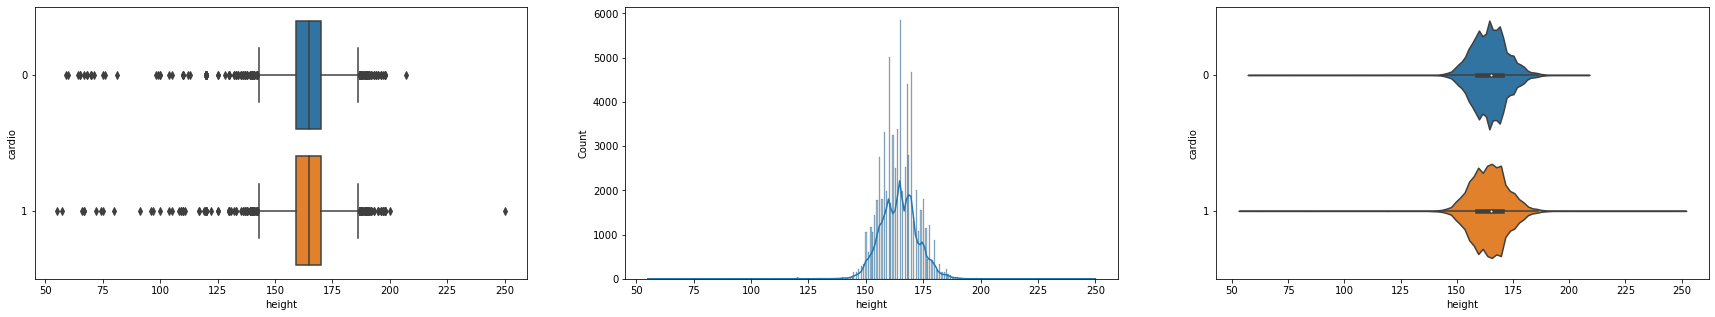

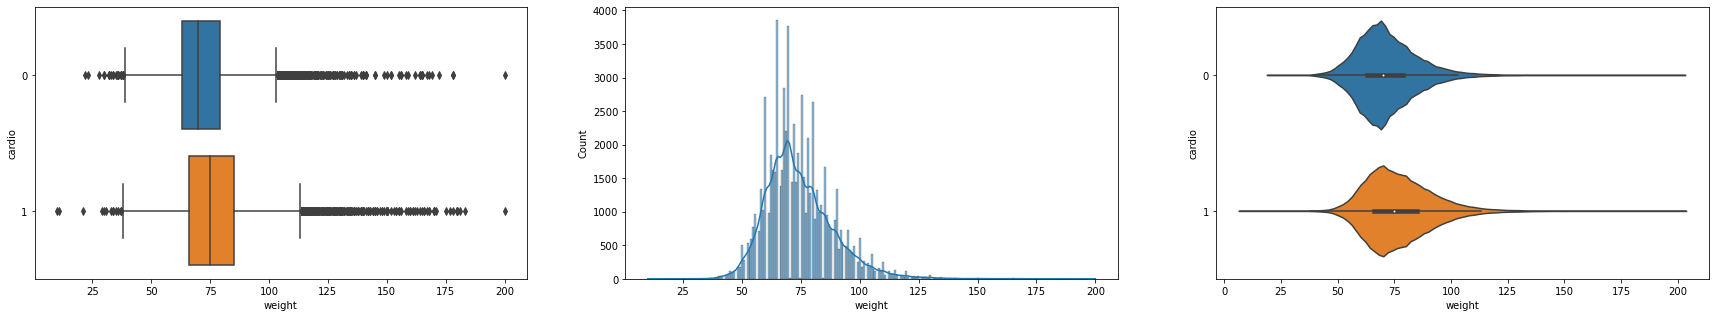

In [22]:
# Bivariate analysis with respect to target class
for attribs in num_attribs:                                                           # iterate over numerical attributes
  fig, axes = plt.subplots(1, 3, figsize=(30,5))                                      # setup the frame of the plot
  sb.boxplot(data=cardio, x=attribs, y='cardio', orient='horizontal', ax=axes[0])     # box plot
  sb.histplot(data=cardio[attribs], kde=True, ax=axes[1])                             # histogram with kde
  sb.violinplot(data=cardio, x=attribs, y='cardio', orient='horizontal', ax=axes[2])  # violin plot

In [23]:
fig , ax = plt.subplots(nrows = len(num_columns), figsize = (8,15))
count = 0
for number in num_columns:
	sb.kdeplot(data = data, x =number, hue = "cardio", ax = ax[count])
	count +=1

NameError: name 'num_columns' is not defined

It can be seen that the distribution of `age` has a noticable difference between those who have CVD and those who don't. In contrast, the distributions of `height` and `weight` do not show the difference between those with CVD and those without, the distributions of positive and negative class almost overlap for both `height` and `weight`.

This means that `age` might be a good factor to distinguish between CVD and non-CVD patients while `height` and `weight` are unlikely to play an important role in predicting the target class.

Let's take a look at how `age` spreads along the target class.

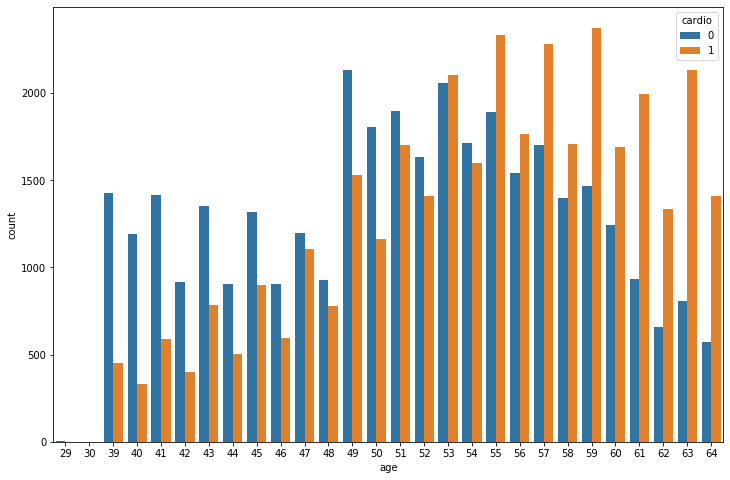

We can observe that after the age of $55$, patients are more exposed to CVD.

Use `catplot()` to observe the correlations between categorical attributes and the target variable `cardio`.

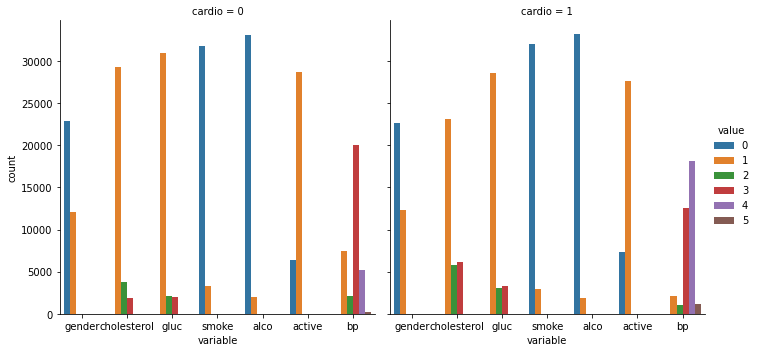

In [ ]:
# Presence and absence of CVDs over each categorical attribute
cat_df = pd.melt(cardio, id_vars=['cardio'], value_vars=cat_attribs[:-1])       # dataframe of categorical attributes
sb.catplot(x='variable', hue='value', col='cardio', data=cat_df, kind='count')  # categorical plot

It can be seen that patients with CVD have higher cholesterol, glucose and blood pressure level.

Another way of doing this is by using `heatmap()`.

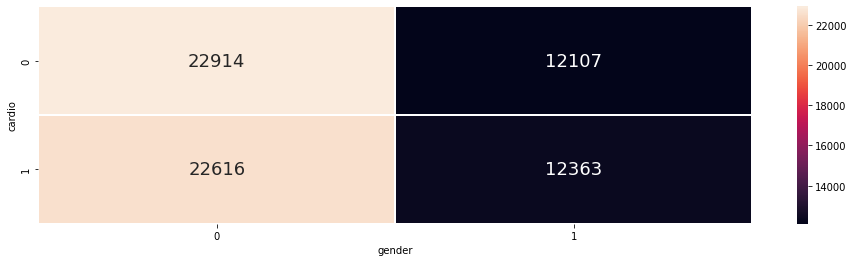

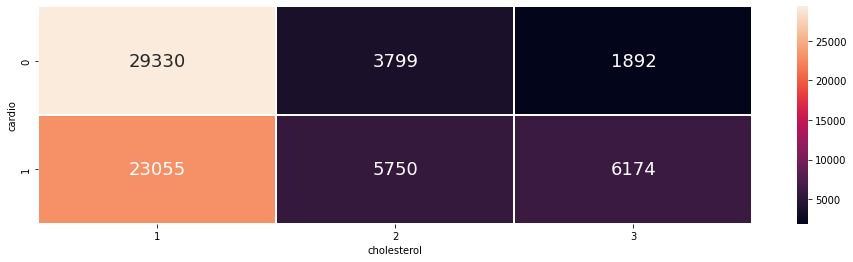

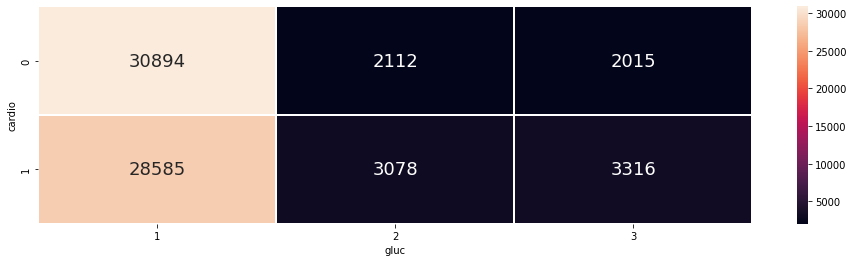

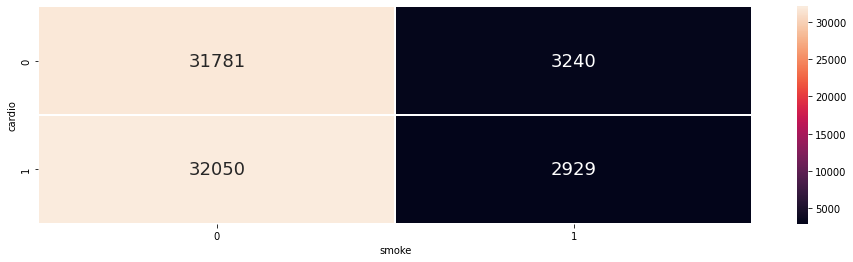

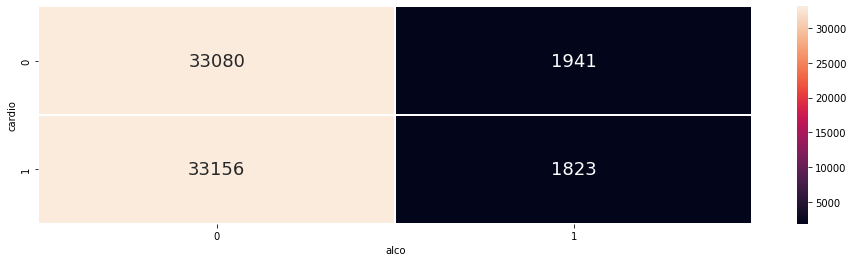

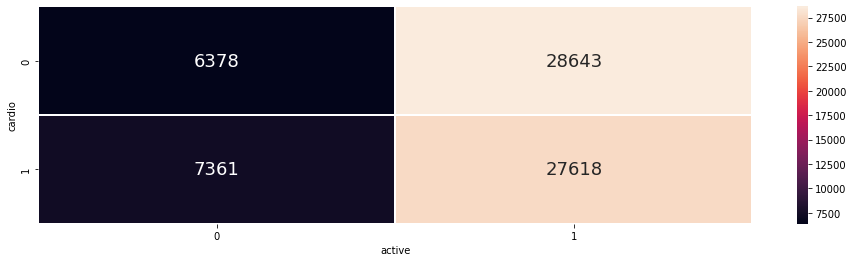

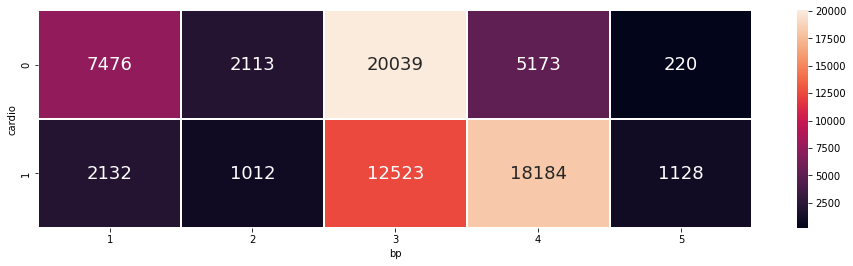

In [ ]:
# The relationship between the presence and absence of CVDs and categorical attributes
for cat_attrib in cat_attribs[:-1]:                                       # iterate over categorical attributes
  fig ,axes = plt.subplots(1, 1, figsize=(16,4))                          # setup the frame of the plot
  sb.heatmap(cardio.groupby(['cardio', cat_attrib]).size().unstack(),
             linewidths=1, annot=True, annot_kws={'size': 18}, fmt='.0f') # heat map

The ratio of patients with CVD to those without is:


*   Approximately $1/1$ for both genders
*   Slightly smaller than $1$ among patients with normal cholesterol and/or glucose levels but noticable among patients with above and well above normal levels
*   Approximately the same for both smokers and non-smokers
*   Approximately the same for both patients who drink alcohol and who don't
*   Approximately the same for both active and inactive patients
*   Significant for each level of blood pressure:
    *   Normal: $1/3$
    *   Elevated: $1/2$
    *   High blood pressure Stage $1$: $2/3$
    *   High blood pressure Stage $2$: $7/2$
    *   Hypertensive crisis: $5/1$



The following code cell will show the correlations between `gender` and other categorical attributes as well as the target class.

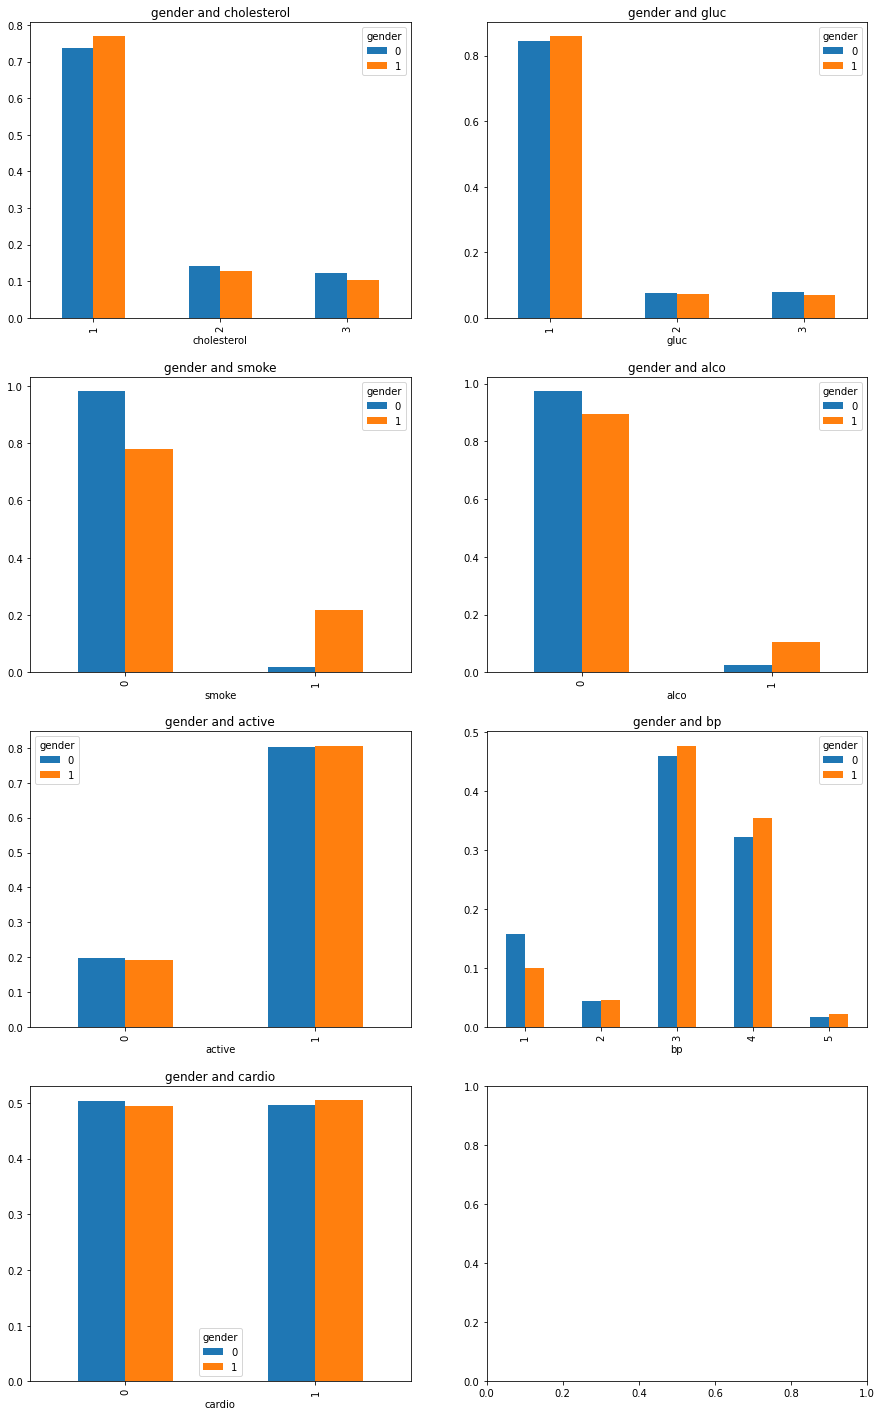

In [ ]:
# Explore Gender
def bardualplot(df, grouping, target, axesx, axesy):
    # Percentage of each group on every target categorical variable
    df[cat_attribs].groupby(grouping)[target].value_counts(normalize=True).unstack(0).plot.bar(ax=axes[axesx][axesy]) # group gender with each categorical attribute
    axes[axesx][axesy].set_title(grouping + ' and ' + target)                                                         # title each plot

# Setup the frame of the plot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,25))

count = 0
for cat_attrib in cat_attribs[1:]:                                  # iterate over categorical attributes
  bardualplot(cardio, 'gender', cat_attrib, count // 2, count % 2)  # plot dual bars
  count += 1

From the above barplots, it is shown that male patients having alcohol and smoking in the dataset is higher than female. However, in this dataset the percentage of a given gender having CVD is almost the same.

### IV.1. Correlations

Let's take a look at the correlation matrix.

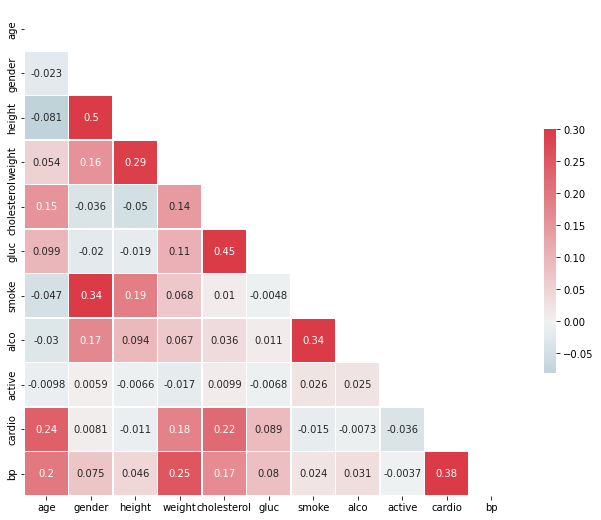

In [ ]:
# Calculate the correlations between attributes
corr = cardio.astype('float').corr()
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, axes = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

It seems like blood pressure (`bp`) has the highest correlation with the target class. Followed by `age`, `cholesterol` and `weight`, but these features are not very high correlated with the target class.

### IV.2. Experimenting with Attribute Combinations

We can try out various attribute combinations before preparing the data for Machine Learning algorithm to see whether those combinations are seemed to be more useful than a bunch of separeted attributes.<br>

Let's make a copy of the dataset to test as we don't know if the attribute combinations that we're going to create are more helpful for the training model or not. And if they're not, we don't want that to affect the original dataset.

In [ ]:
# Create a copy of the dataset
cardio_exp = cardio.copy()

Here, we consider the [Body Mass Index (BMI)](https://en.wikipedia.org/wiki/Body_mass_index) of the patient, which can be derived from the formula:<br>

$$BMI = \frac{weight}{height \times height}$$

,where $weight$ is the weight of the patient in the units of $kilogram$ ($kg$), $height$ is the height of the patient in the units of $meter$ ($m$).

With the above formula, we will calculate and introduce a new attribute `bmi`.

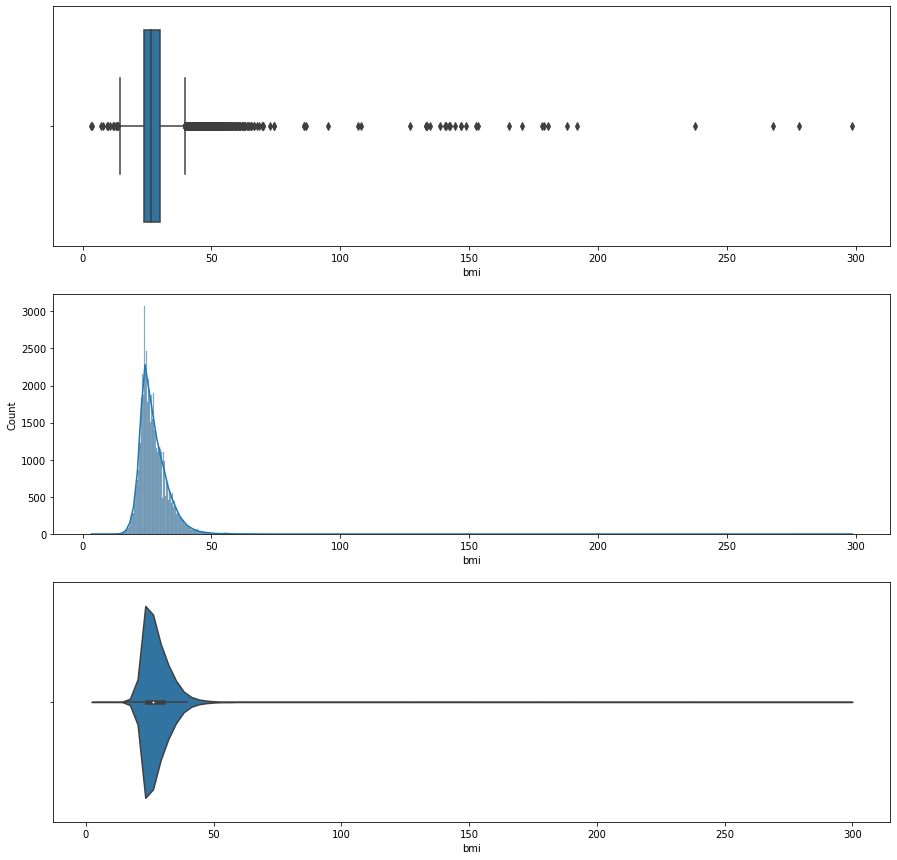

In [ ]:
# Caculate bmi for every patients
cardio_exp['bmi'] = cardio_exp['weight'] / (cardio_exp['height'] / 100) ** 2

# Visualize the distribution of the bmi
fig, axes = plt.subplots(3, 1, figsize=(15,15))                 # setup the frame of the plot
sb.boxplot(data=cardio_exp, x='bmi', orient='h', ax=axes[0])    # box plot
sb.histplot(data=cardio_exp['bmi'], kde=True, ax=axes[1])       # histogram with kde
sb.violinplot(data=cardio_exp, x='bmi', orient='h', ax=axes[2]) # violin plot


From BMI, we can construct categories of obesity, which is more commonly use. The categories of this categorical attribute are as follow:


1.   Underweight ($BMI < 18.5$)
2.   Healthy Weight ($18.5 <= BMI < 25$)
3.   Overweight ($25 <= BMI < 30$)
4.   Obese ($BMI >= 30$)



In [ ]:
# Extract feature bmi from the dataset
bmi = cardio_exp['bmi']

# Rank BMI
cardio_exp['obesity'] = 1                                 # initiate every training examples to underweight
cardio_exp.loc[(bmi >= 18.5) & (bmi < 25), 'obesity'] = 2 # healthy weight
cardio_exp.loc[(bmi >= 25) & (bmi < 30), 'obesity'] = 3   # overweight
cardio_exp.loc[bmi >= 30, 'obesity'] = 4                  # obese

# Change data type to 'category'
cardio_exp['obesity'] = cardio_exp['obesity'].astype('category')

In [ ]:
# Take a look at some random data points from the dataset
cardio_exp.sample(10)

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,bp,bmi,obesity
44544,57,0,160,72.0,3,3,0,0,1,1,3,28.125000,3
62089,60,1,168,62.0,2,1,0,0,1,1,4,21.967120,2
16185,50,0,164,70.0,1,1,0,0,1,0,3,26.026175,3
41278,59,0,168,69.0,1,1,0,0,1,0,3,24.447279,2
52657,39,1,169,70.0,1,1,0,0,1,0,3,24.508946,2
49115,58,1,175,67.0,1,1,1,0,1,0,1,21.877551,2
22436,56,0,163,107.0,1,1,0,0,1,0,3,40.272498,4
35366,46,0,150,56.0,1,1,0,0,1,1,3,24.888889,2
15744,50,0,168,71.0,1,1,0,0,0,0,1,25.155896,3
1290,51,0,164,48.0,1,1,0,0,1,0,3,17.846520,1


In [ ]:
# Some infomation about the dataset
cardio_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          70000 non-null  int64   
 1   gender       70000 non-null  category
 2   height       70000 non-null  int64   
 3   weight       70000 non-null  float64 
 4   cholesterol  70000 non-null  category
 5   gluc         70000 non-null  category
 6   smoke        70000 non-null  category
 7   alco         70000 non-null  category
 8   active       70000 non-null  category
 9   cardio       70000 non-null  category
 10  bp           70000 non-null  category
 11  bmi          70000 non-null  float64 
 12  obesity      70000 non-null  category
dtypes: category(9), float64(2), int64(2)
memory usage: 2.7 MB


The distribution of categorical attribute `obesity`.

Stage of Obesity: 4
2    25790
3    25086
4    18474
1      650
Name: obesity, dtype: int64


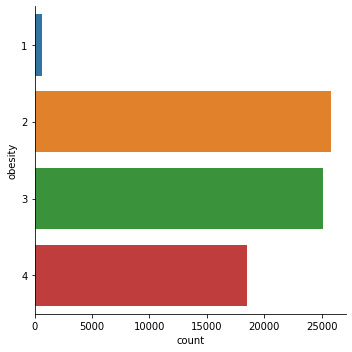

In [ ]:
# Print the number of unique categories in bmi
print("Stage of Obesity:", len(cardio_exp['obesity'].unique()))

# Plot the count of each category in bmi
print(cardio_exp['obesity'].value_counts())             # count the number of each category
sb.catplot(y='obesity', data=cardio_exp, kind='count')  # categorical plot

We can take a look on how this new feature `obesity` correlates with the target variable `cardio` using `heatmap()`.

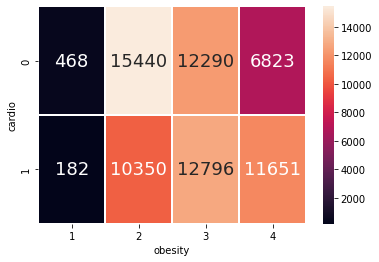

In [ ]:
# Plot heatmap between target class and obesity
sb.heatmap(cardio_exp.groupby(['cardio', 'obesity']).size().unstack(),
           linewidths=1, annot=True, annot_kws={'size': 18}, fmt='.0f')

Base on the obesity rating we observe that:


*   For underweight and healthy patients, the majority don't have disease
*   For overweight patients, the number of people have and don't have disease is about the same
*   For obese patients, the majority has disease


This attribute might be useful.

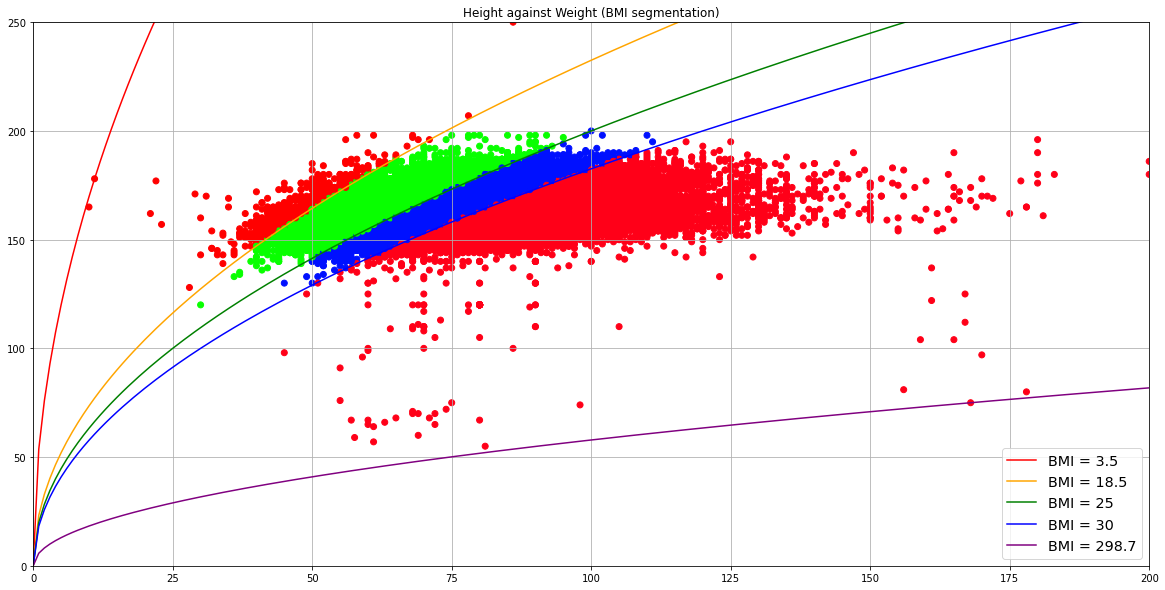

In [ ]:
# Plot the BMI graph for visualization
fig = plt.figure(figsize = (20,10))
plt.scatter(x='weight', y='height', c='obesity', data=cardio_exp, cmap='hsv', label="")

x_val = np.arange(0,300)
plt.plot(x_val,np.sqrt(x_val/bmi.min())*100, c='red', label="BMI = "+str(round(bmi.min(),1)))
plt.plot(x_val,np.sqrt(x_val/18.5)*100, c='orange', label="BMI = 18.5")
plt.plot(x_val,np.sqrt(x_val/25)*100, c='green', label="BMI = 25")
plt.plot(x_val,np.sqrt(x_val/30)*100, c='blue', label="BMI = 30")
plt.plot(x_val,np.sqrt(x_val/bmi.max())*100, c='purple', label="BMI = "+str(round(bmi.max(),1)))

plt.xlim([0, cardio_exp['weight'].max()])
plt.ylim([0, cardio_exp['height'].max()])
plt.title("Height against Weight (BMI segmentation)")
plt.legend(fontsize='x-large')
plt.grid(True)
plt.show()

### IV.3. Clustering

Now let's try some clustering models on the BMI graph to see whether we can find a pattern.

##### IV.3.1. K-means Clustering

[K-means Clustering](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) uses distance between points to cluster them.

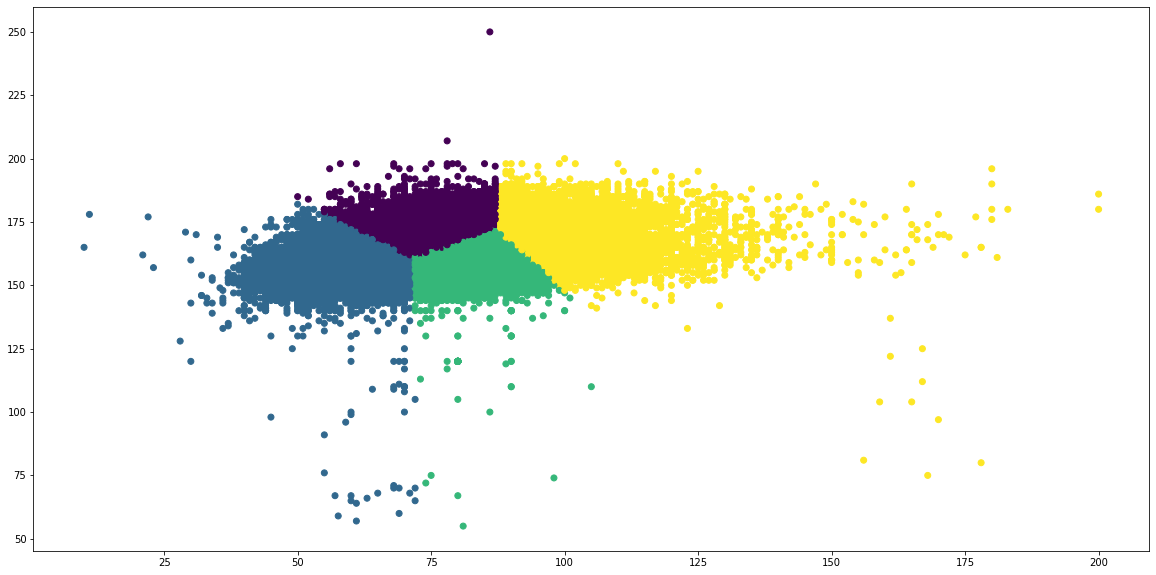

In [ ]:
# Import KMeans Clustering model from scikit learn
from sklearn.cluster import KMeans

# Extract feature height and weigh from the dataset
hw = pd.DataFrame(cardio_exp[['height','weight']])

# KMeans Clustering model
kmean = KMeans(n_clusters=4, init='k-means++', n_init=10) # create kmeans clustering object
kmean.fit(hw)                                             # train the kmeans clustering model

# Predict clusters
labels = kmean.predict(hw)
hw_cluster = hw.copy()
hw_cluster['Cluster'] = pd.Categorical(labels)

# Visualize clusters using scatter plot
fig1 = plt.figure(figsize = (20,10))
plt.scatter(x='weight', y='height', c='Cluster', data=hw_cluster)

##### IV.3.2. Gaussian Mixture

[Gaussian Mixture](https://towardsdatascience.com/gaussian-mixture-models-d13a5e915c8e) assumes that the data are generated from a finite number of Gaussian distribution.

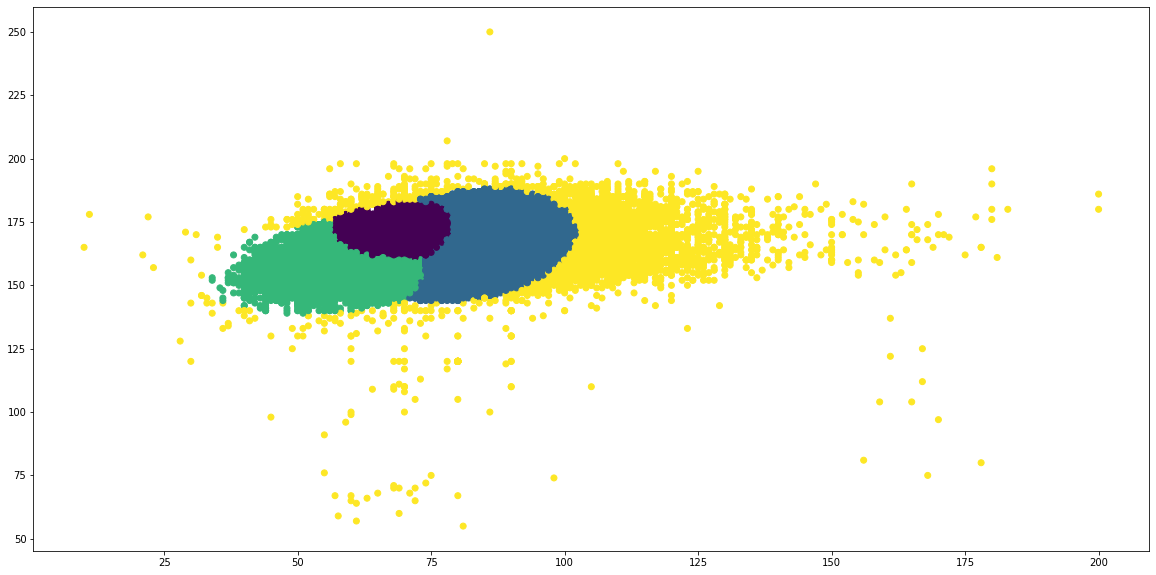

In [ ]:
# Import Gaussian Mixture model from scikit learn
from sklearn.mixture import GaussianMixture

# Gaussian Mixture model
gauss = GaussianMixture(n_components=4) # create Gaussian mixture object
gauss.fit(hw)                           # train the Gaussian mixture model

# Predict clusters
labels = gauss.predict(hw)
hw_cluster = hw.copy()
hw_cluster['Cluster'] = pd.Categorical(labels)

# Visualize clusters using scatter plot
fig1 = plt.figure(figsize = (20,10))
plt.scatter(x='weight', y='height', c='Cluster', data=hw_cluster)

These clustering methods assume a "centroid" center point (Gaussian has a mean of distribution). Other type of clustering was tried but it led to crashing due to the large number of data-points and the need to calculate distance pairwise between data point.

As seen in the BMI graph and due to BMI calculation, BMI clusters are segmented using the a quadratic formula:

$$BMI = \frac{weight}{height \times height}$$

It was derived in the 19th century. Like machine learning, people try to learn and pick out the pattern from various data. The model the originator of BMI used was a simple quadratic formula. However, in the past, they lack the tools for big data collection and analysis. Hence many even questioned the effectiveness of BMI. However, it stills serve as a good rules of thumb.

More clustering models can be found [here](https://scikit-learn.org/stable/modules/clustering.html).

### IV.4. Bayesian Probability

The percentage of patients who has CVD smokes is 8.37%
The percentage of patients who don't have CVD smoke is 9.25%
The percentage of patients who smokes has CVD is 47.48%
The percentage of patients who doesn't smoke has CVD smoke is 50.21%


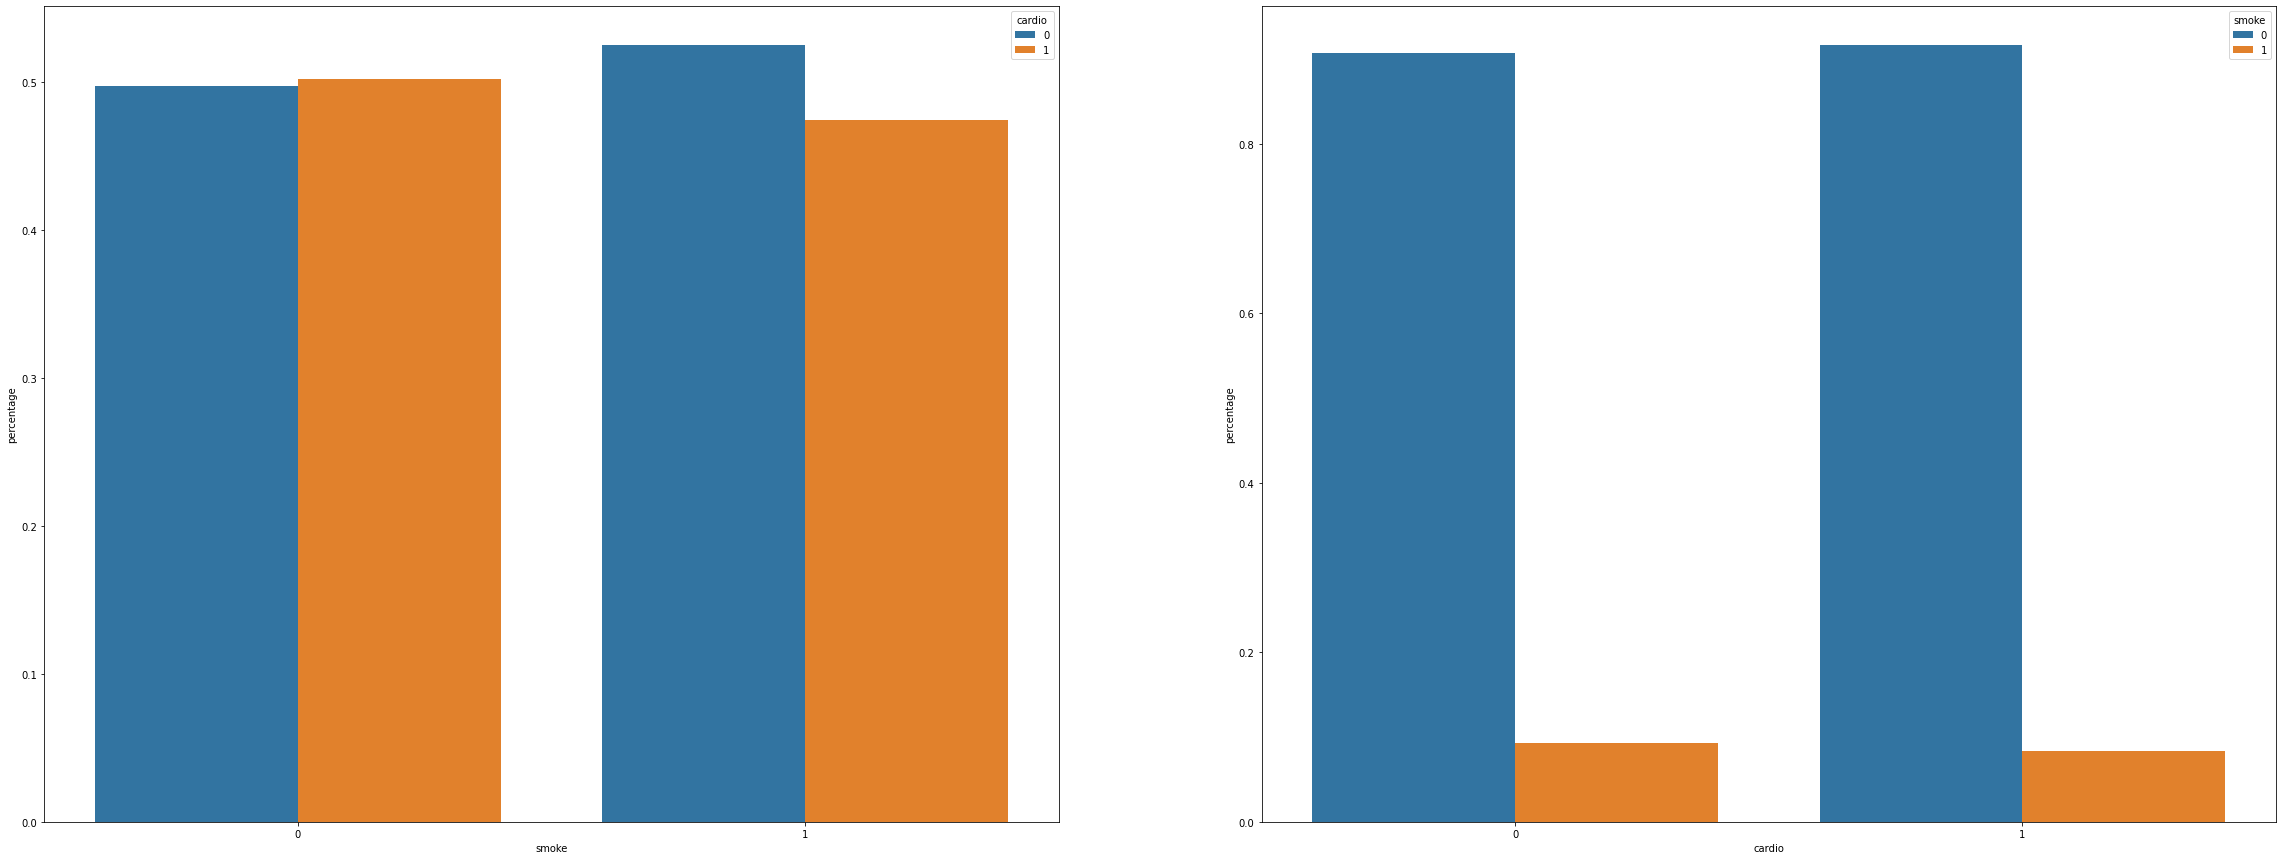

In [ ]:
# Percentage of patients who smoke get CVD
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40,15))

grouped = cardio.groupby(['smoke'], sort=False)
percent_1 = grouped['cardio'].value_counts(normalize=True, sort=False).rename('percentage').reset_index()
sb.barplot(x='smoke', y='percentage', hue='cardio', data=percent_1, ax=axes[0])

grouped = cardio.groupby(['cardio'], sort=False)
percent_2 = grouped['smoke'].value_counts(normalize=True, sort=False).rename('percentage').reset_index()
sb.barplot(x='cardio', y='percentage', hue='smoke', data=percent_2, ax=axes[1])


print("The percentage of patients who has CVD smokes is {:.2f}%".format(percent_2.loc[3, 'percentage'] * 100))
print("The percentage of patients who don't have CVD smoke is {:.2f}%".format(percent_2.loc[1, 'percentage'] * 100))
print("The percentage of patients who smokes has CVD is {:.2f}%".format(percent_1.loc[3, 'percentage'] * 100))
print("The percentage of patients who doesn't smoke has CVD smoke is {:.2f}%".format(percent_1.loc[1, 'percentage'] * 100))

It can be shown that from this dataset, smoking is not the main factor of causing CVD as there are patients who smokes and doesn't smoke have similar percentage of having CVD. As the dataset has significantly high percentage of patients who doesn't smoke given the countplot below, given the rate of having CVD is almost the same.

The percentage of patients has CVD smokes is very small. Hence, there are other reason causing patients to have CVD.

0    32050
1     2929
Name: smoke, dtype: int64


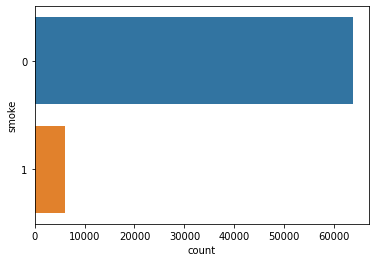

In [ ]:
sb.countplot(y='smoke', data=cardio)
print(cardio[cardio['cardio'] == 1]['smoke'].value_counts())

The percentage of patients who has CVD has high glucose level is 9.48%
The percentage of patients who don't have CVD has high glucose level is 5.75%
The percentage of patients who has high glucose level has CVD is 62.20%
The percentage of patients who doesn't have high glucose level has CVD has high glucose level is 48.06%


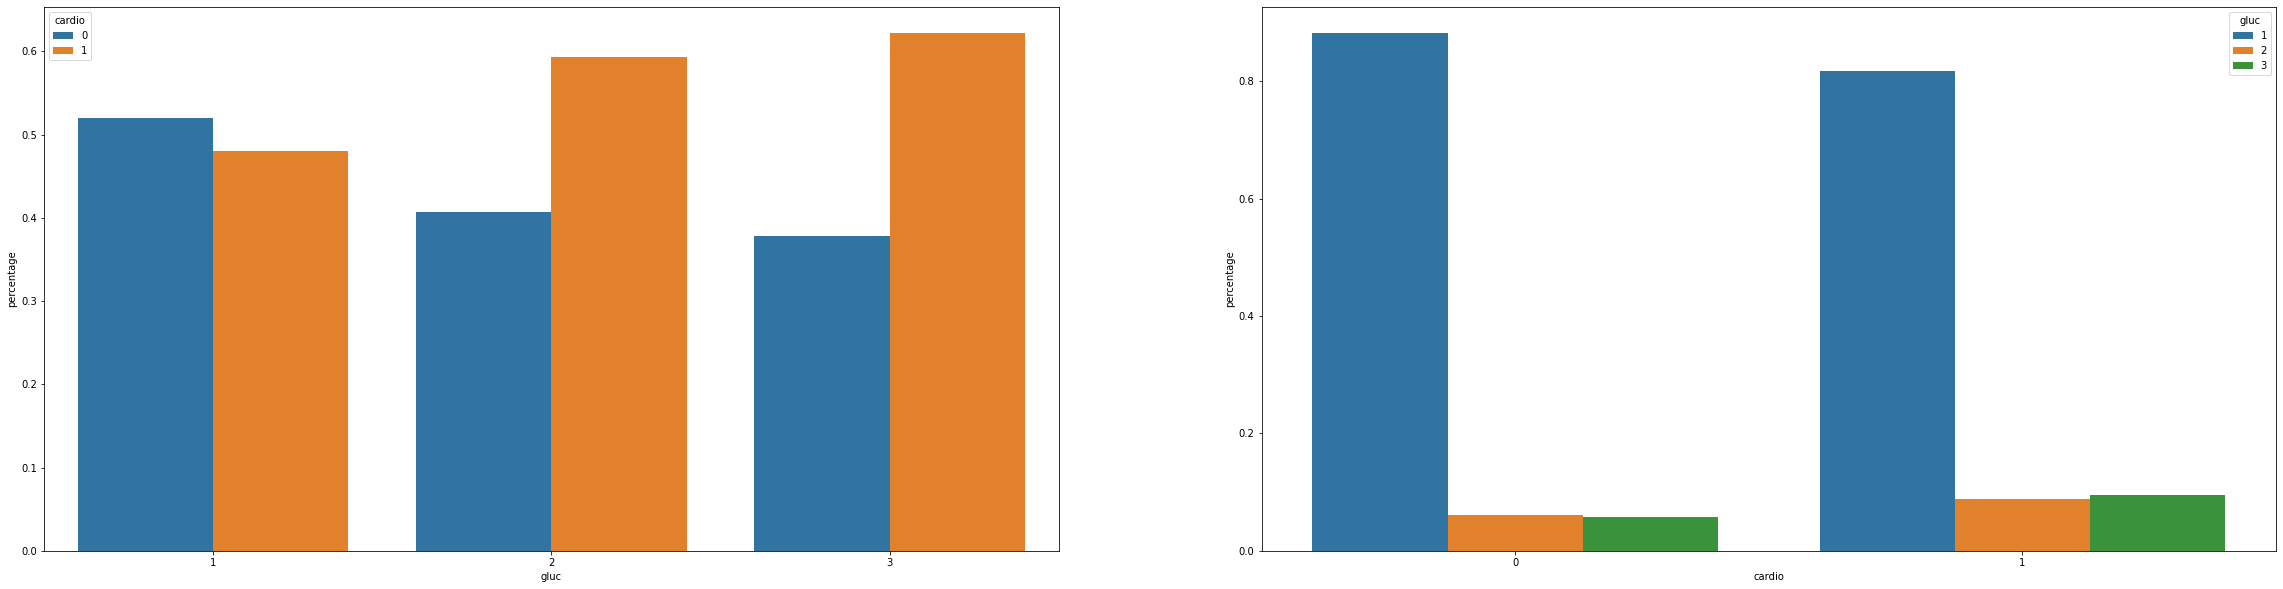

In [ ]:
# Percentage of patients who has high level of glucose get CVD
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40,10))

grouped = cardio.groupby(['gluc'], sort=False)
percent_1 = grouped['cardio'].value_counts(normalize=True, sort=False).rename('percentage').reset_index()
sb.barplot(x="gluc", y="percentage", hue="cardio", data=percent_1, ax=axes[0])

grouped = cardio.groupby(['cardio'], sort=False)
percent_2 = grouped['gluc'].value_counts(normalize=True, sort=False).rename('percentage').reset_index()
sb.barplot(x="cardio", y="percentage", hue="gluc", data=percent_2, ax=axes[1])


print("The percentage of patients who has CVD has high glucose level is {:.2f}%".format(percent_2.loc[5, 'percentage'] * 100))
print("The percentage of patients who don't have CVD has high glucose level is {:.2f}%".format(percent_2.loc[2, 'percentage'] * 100))
print("The percentage of patients who has high glucose level has CVD is {:.2f}%".format(percent_1.loc[5, 'percentage'] * 100))
print("The percentage of patients who doesn't have high glucose level has CVD has high glucose level is {:.2f}%".format(percent_1.loc[1, 'percentage'] * 100))

It can be shown that the percentage of patients has high glucose level has higher percentage of having CVD. However that is still a large percentage of patients having CVD, it is because that there are lots of patients having normal glucose level in the dataset and there is certain base rate of patients has normal glucose level has CVD.

Hence, the percentage of patients having CVD has normal glucose level is very high. This might be a useful predictor for the model.

1    28585
3     3316
2     3078
Name: gluc, dtype: int64


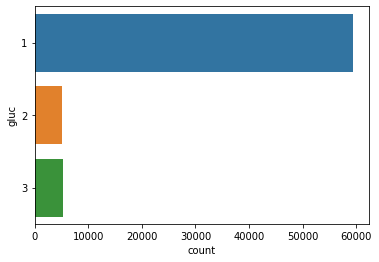

In [ ]:
sb.countplot(y='gluc', data=cardio)
print(cardio[cardio['cardio'] == 1]['gluc'].value_counts())

The percentage of patients who has CVD drink alcohol is 5.21%
The percentage of patients who don't have CVD drink alcohol is 5.54%
The percentage of patients who drinks alcohol has CVD is 48.43%
The percentage of patients who doesn't drink alcohol has CVD is 50.06%


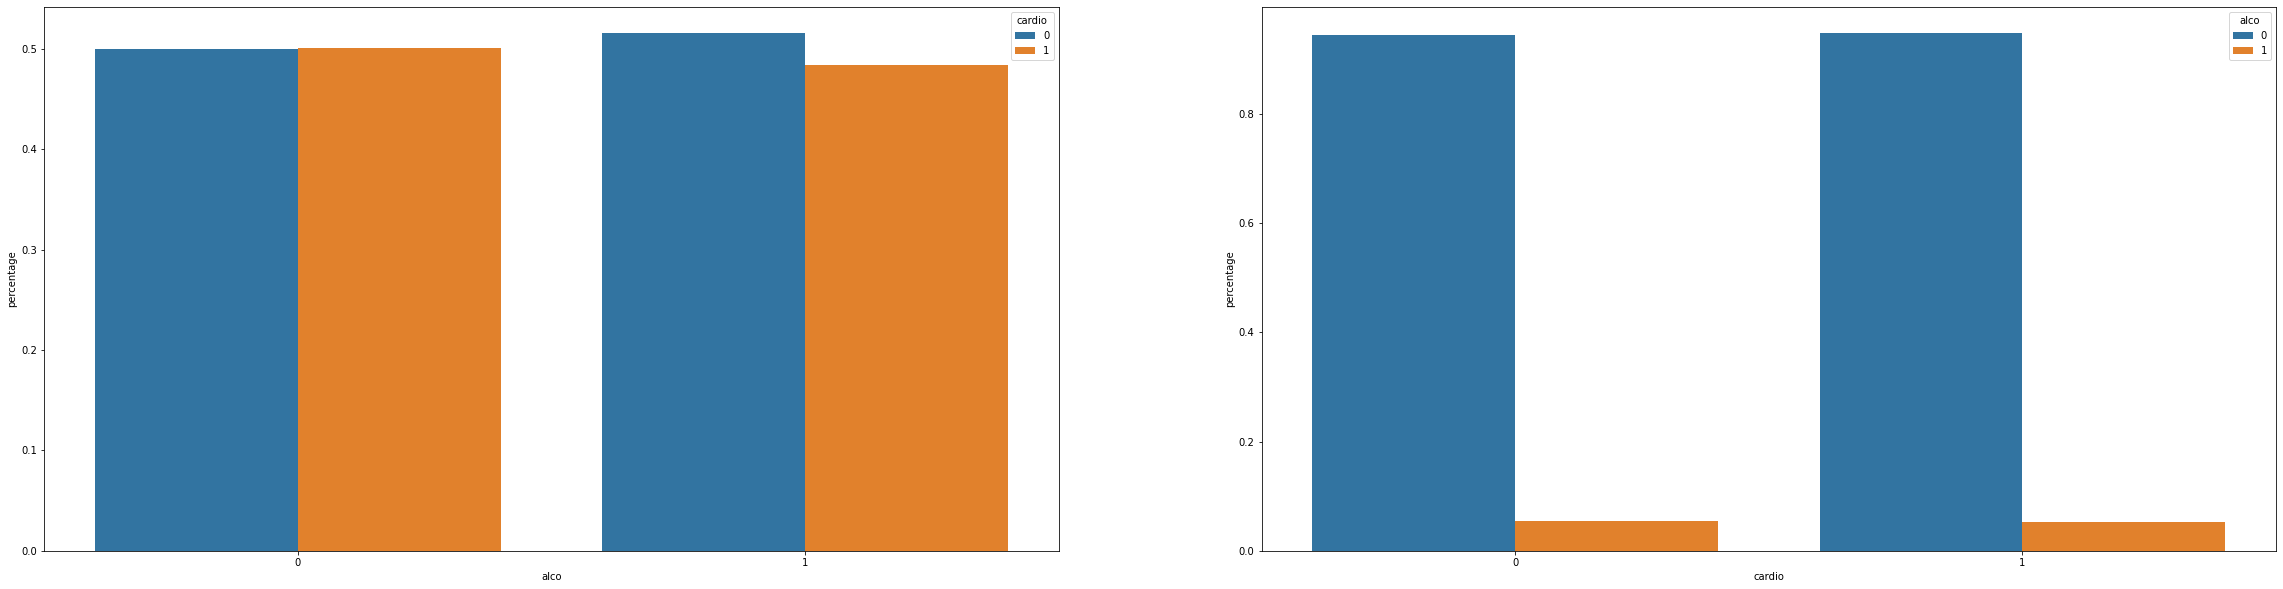

In [ ]:
# Percentage of patients who smoke get CVD
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40,10))

grouped = cardio.groupby(['alco'], sort=False)
percent_1 = grouped['cardio'].value_counts(normalize=True, sort=False).rename('percentage').reset_index()
sb.barplot(x="alco", y="percentage", hue="cardio", data=percent_1, ax=axes[0])

grouped = cardio.groupby(['cardio'], sort=False)
percent_2 = grouped['alco'].value_counts(normalize=True, sort=False).rename('percentage').reset_index()
sb.barplot(x="cardio", y="percentage", hue="alco", data=percent_2, ax=axes[1])

print("The percentage of patients who has CVD drink alcohol is {:.2f}%".format(percent_2.loc[3, 'percentage'] * 100))
print("The percentage of patients who don't have CVD drink alcohol is {:.2f}%".format(percent_2.loc[1, 'percentage'] * 100))
print("The percentage of patients who drinks alcohol has CVD is {:.2f}%".format(percent_1.loc[3, 'percentage'] * 100))
print("The percentage of patients who doesn't drink alcohol has CVD is {:.2f}%".format(percent_1.loc[1, 'percentage'] * 100))

It can be shown that in this dataset drinking alcohol does not lead to having CVD. It is because the percentage of patients drink alcohol and doesn't drink alcohol is almost the same.

From a study, drinking alcohol can have a certain benefit by increase the 'HDL' level in our body. 